In [174]:
import pandas as pd 
import numpy as np

### DEFINITIVE PLOTS 

#### F1

In [12]:
name_results_mean = 'KNN_results_exp/mean/'
name_results_std = 'KNN_results_exp/std/'

In [13]:
random_name_mean =  name_results_mean + 'NEW_CORR_KNN_kmeans_class_results/'
random_name_std = name_results_std +  'NEW_CORR_KNN_kmeans_class_results/'

random_name_mean

import pandas as pd

# Initialize an empty dictionary to store the results
results_dict = {}

for feature_type in ['original_feat/', 'only_difference/', 'both_original_and_diff/']:
    name_temp_mean = random_name_mean + feature_type
    name_temp_std = random_name_std + feature_type

    for dataset_size in ['full_dataset/']:
        name_temp_size_mean = name_temp_mean + dataset_size
        name_temp_size_std = name_temp_std + dataset_size

        for fix_strat in ['free/', 'fix_feat/', 'fix_thr/']:
            name_temp_fix_strat_mean = name_temp_size_mean + fix_strat
            name_temp_fix_strat_std = name_temp_size_std + fix_strat

            try:
                # Read the mean and standard deviation tables
                table_mean = pd.read_csv(name_temp_fix_strat_mean + 'res_table.csv')
                table_std = pd.read_csv(name_temp_fix_strat_std + 'res_table.csv')

                
                # Store in the dictionary using a structured key
                key = (feature_type.strip('/'), dataset_size.strip('/'), fix_strat.strip('/'))
                results_dict[key] = {'mean': table_mean, 'std': table_std}

            except FileNotFoundError as e:
                print(f"File not found: {e}")

# Now `results_dict` contains all loaded DataFrames categorized by feature type, dataset size, and fix strategy.

results_dict = {k + (random_name_mean.split('_')[5],) : v for k, v in results_dict.items()}

In [14]:
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

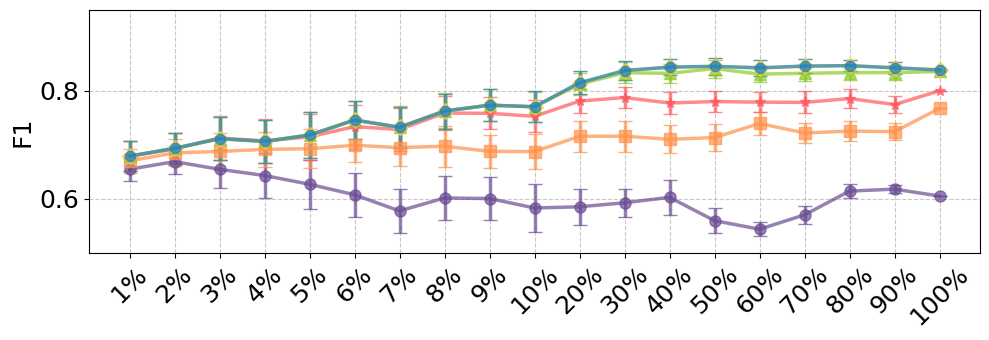

In [15]:
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')
res_mean = results_dict[ref_tuple + ('kmeans',)]['mean']
res_std = results_dict[ref_tuple + ('kmeans',)]['std']

import matplotlib.pyplot as plt
import numpy as np

# Ensure ref_tuple is correctly set
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

# Extract means and stds from the dictionaries
res_mean = results_dict.get(ref_tuple + ('kmeans',))['mean']
res_std = results_dict.get(ref_tuple + ('kmeans',))['std']

# Define the new color map based on the provided colors
COLOR_MAP = {
    '2': '#6a4c93',  # Purple
    '4': '#ff924c',  # Peach
    '8': '#ff595e',  # Red
    '16': '#8ac926', # Green
    '32': '#ffca3a', # Yellow
    '64': '#1982c4'  # Blue
}

# Define markers with increased size
MARKER_MAP = {
    '2': 'o',  # Circle
    '4': 's',  # Square
    '8': '*',  # Star
    '16': '^', # Triangle Up
    '32': 'D', # Diamond
    '64': '8'  # Octagon
}

# Ensure the extracted data is valid before proceeding
if res_mean is not None and res_std is not None:
    # Drop non-numeric columns from DataFrames (if needed)
    res_mean = res_mean.select_dtypes(include=[np.number])
    res_std = res_std.select_dtypes(include=[np.number])

    # Create figure for a single plot
    fig, ax = plt.subplots(figsize=(10, 3.5))

    # For each column, plot the mean with the standard deviation as error bars
    for col in res_mean.columns:
        y = res_mean[col]
        y_err = [0.5 * _ for _ in res_std[col]]  # Adjusted error bars

        # Use color and marker mapping
        color = COLOR_MAP.get(str(col), 'black')  # Default to black if no color is found
        marker = MARKER_MAP.get(str(col), 'o')  # Default to circle if no marker is found

        # Plot the data with error bars and transparency
        ax.errorbar(np.arange(len(y)), y, yerr=y_err, label=f"{col}",
                    capsize=5, marker=marker, linestyle='-', markersize=8, linewidth=2.5, color=color, alpha=0.7)

    # Set the custom x-axis labels (in percentage form)

    ax.tick_params(axis='both', labelsize=18)

    # Set the custom x-axis labels (in percentage form)
    custom_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    ax.set_xticks(np.arange(len(custom_labels)))  # Set the tick positions
    ax.set_xticklabels([f"{label}%" for label in custom_labels], fontsize=18,  rotation=45)  # Set custom labels with "%" sign

    #ax.set_title("center-based clustering", fontsize=38, pad=10)
    ax.set_ylim(0.5, 0.95)  # Set Y-axis range from 0.6 to 0.9
    ax.set_ylabel("F1", fontsize=18)  # Set the Y-axis label as F1
    ax.grid(True, linestyle="--", alpha=0.7)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles, labels, title="max depth", title_fontsize=14, fontsize=12,
    #          loc="upper right", bbox_to_anchor=(1.14, 1.06), frameon=False)

    # Adjust layout
    plt.tight_layout()
    #plt.savefig("F1_centroid_plot.png", dpi=300, bbox_inches='tight', transparent=False)
    plt.show()
    

else:
    print("Error: Missing required data in results_dict.")


In [16]:
random_name_mean =  name_results_mean + 'NEW_CORR_KNN_random_results/'
random_name_std = name_results_std +  'NEW_CORR_KNN_random_results/'

random_name_mean

import pandas as pd

# Initialize an empty dictionary to store the results
results_dict = {}

for feature_type in ['original_feat/', 'only_difference/', 'both_original_and_diff/']:
    name_temp_mean = random_name_mean + feature_type
    name_temp_std = random_name_std + feature_type

    for dataset_size in ['full_dataset/']:
        name_temp_size_mean = name_temp_mean + dataset_size
        name_temp_size_std = name_temp_std + dataset_size

        for fix_strat in ['free/', 'fix_feat/', 'fix_thr/']:
            name_temp_fix_strat_mean = name_temp_size_mean + fix_strat
            name_temp_fix_strat_std = name_temp_size_std + fix_strat

            try:
                # Read the mean and standard deviation tables
                table_mean = pd.read_csv(name_temp_fix_strat_mean + 'res_table.csv')
                table_std = pd.read_csv(name_temp_fix_strat_std + 'res_table.csv')


                # Store in the dictionary using a structured key
                key = (feature_type.strip('/'), dataset_size.strip('/'), fix_strat.strip('/'))
                results_dict[key] = {'mean': table_mean, 'std': table_std}

            except FileNotFoundError as e:
                print(f"File not found: {e}")

# Now `results_dict` contains all loaded DataFrames categorized by feature type, dataset size, and fix strategy.

results_dict = {k + (random_name_mean.split('_')[5],) : v for k, v in results_dict.items()}

In [17]:
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

In [18]:
res_mean = results_dict[ref_tuple + ('random',)]['mean']
res_std = results_dict[ref_tuple + ('random',)]['std']

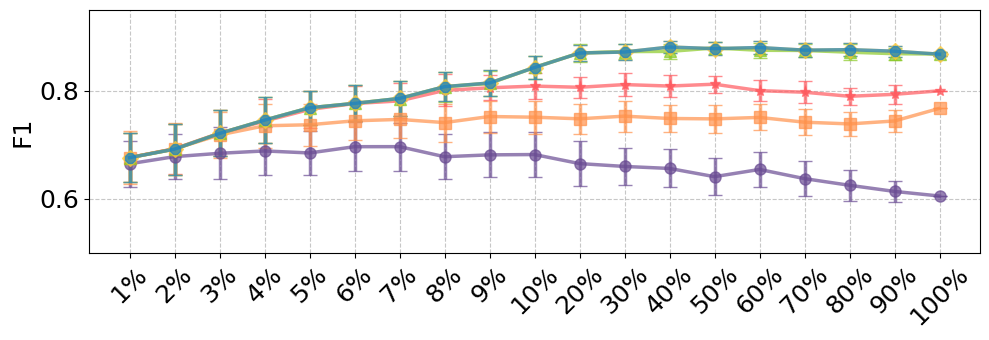

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure ref_tuple is correctly set
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

# Extract means and stds from the dictionaries
res_mean = results_dict.get(ref_tuple + ('random',))['mean']
res_std = results_dict.get(ref_tuple + ('random',))['std']

# Define the new color map based on the provided colors
COLOR_MAP = {
    '2': '#6a4c93',  # Purple
    '4': '#ff924c',  # Peach
    '8': '#ff595e',  # Red
    '16': '#8ac926', # Green
    '32': '#ffca3a', # Yellow
    '64': '#1982c4'  # Blue
}

# Define markers with increased size
MARKER_MAP = {
    '2': 'o',  # Circle
    '4': 's',  # Square
    '8': '*',  # Star
    '16': '^', # Triangle Up
    '32': 'D', # Diamond
    '64': '8'  # Octagon
}

# Ensure the extracted data is valid before proceeding
if res_mean is not None and res_std is not None:
    # Drop non-numeric columns from DataFrames (if needed)
    res_mean = res_mean.select_dtypes(include=[np.number])
    res_std = res_std.select_dtypes(include=[np.number])

    # Create figure for a single plot
    fig, ax = plt.subplots(figsize=(10, 3.5))

    # For each column, plot the mean with the standard deviation as error bars
    for col in res_mean.columns:
        y = res_mean[col]
        y_err = [0.5 * _ for _ in res_std[col]]  # Adjusted error bars

        # Use color and marker mapping
        color = COLOR_MAP.get(str(col), 'black')  # Default to black if no color is found
        marker = MARKER_MAP.get(str(col), 'o')  # Default to circle if no marker is found

        # Plot the data with error bars and transparency
        ax.errorbar(np.arange(len(y)), y, yerr=y_err, label=f"{col}",
                    capsize=5, marker=marker, linestyle='-', markersize=8, linewidth=2.5, color=color, alpha=0.7)

    # Set the custom x-axis labels (in percentage form)

    ax.tick_params(axis='both', labelsize=18)

    # Set the custom x-axis labels (in percentage form)
    custom_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    ax.set_xticks(np.arange(len(custom_labels)))  # Set the tick positions
    ax.set_xticklabels([f"{label}%" for label in custom_labels], fontsize=18,  rotation=45)  # Set custom labels with "%" sign

    ax.set_ylabel("F1", fontsize=18)  # Set Y-axis label size


    #ax.set_title("random", fontsize=38, pad=10)
    ax.set_ylim(0.5, 0.95)  # Set Y-axis range from 0.6 to 0.9
    ax.set_ylabel("F1", fontsize=18)  # Set the Y-axis label as F1
    ax.grid(True, linestyle="--", alpha=0.7)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles, labels, title="max depth", title_fontsize=14, fontsize=12,
    #          loc="upper right", bbox_to_anchor=(1.14, 1.06), frameon=False)

    # Adjust layout
    plt.tight_layout()
    #plt.savefig("F1_random_plot.png", dpi=300, bbox_inches='tight', transparent=False)
    plt.show()
    

else:
    print("Error: Missing required data in results_dict.")


### R2

In [20]:
name_results_mean = 'R2_results_exp/mean/'
name_results_std = 'R2_results_exp/std/'

In [21]:
random_name_mean =  name_results_mean + 'NEW_CORR_KNN_kmeans_class_results/'
random_name_std = name_results_std +  'NEW_CORR_KNN_kmeans_class_results/'

random_name_mean

import pandas as pd

# Initialize an empty dictionary to store the results
results_dict = {}

for feature_type in ['original_feat/', 'only_difference/', 'both_original_and_diff/']:
    name_temp_mean = random_name_mean + feature_type
    name_temp_std = random_name_std + feature_type

    for dataset_size in ['full_dataset/']:
        name_temp_size_mean = name_temp_mean + dataset_size
        name_temp_size_std = name_temp_std + dataset_size

        for fix_strat in ['free/', 'fix_feat/', 'fix_thr/']:
            name_temp_fix_strat_mean = name_temp_size_mean + fix_strat
            name_temp_fix_strat_std = name_temp_size_std + fix_strat

            try:
                # Read the mean and standard deviation tables
                table_mean = pd.read_csv(name_temp_fix_strat_mean + 'res_table.csv')
                table_std = pd.read_csv(name_temp_fix_strat_std + 'res_table.csv')

                
                # Store in the dictionary using a structured key
                key = (feature_type.strip('/'), dataset_size.strip('/'), fix_strat.strip('/'))
                results_dict[key] = {'mean': table_mean, 'std': table_std}

            except FileNotFoundError as e:
                print(f"File not found: {e}")

# Now `results_dict` contains all loaded DataFrames categorized by feature type, dataset size, and fix strategy.

results_dict = {k + (random_name_mean.split('_')[5],) : v for k, v in results_dict.items()}

In [22]:
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

In [23]:
res_mean = results_dict[ref_tuple + ('kmeans',)]['mean']
res_std = results_dict[ref_tuple + ('kmeans',)]['std']

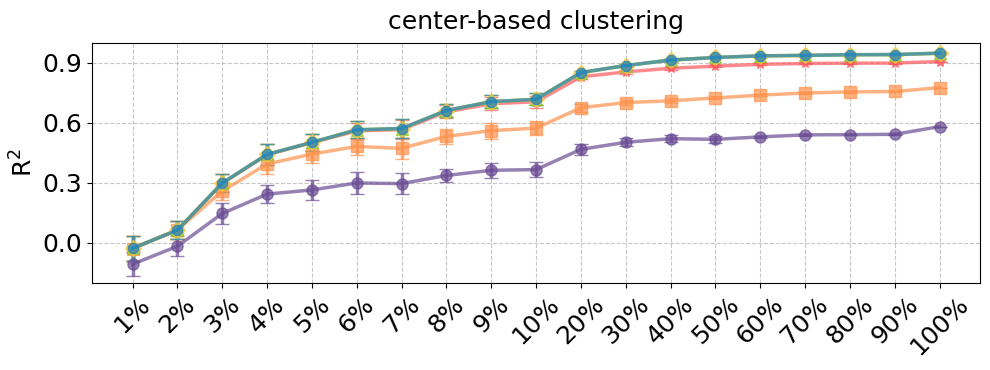

In [24]:
import matplotlib.pyplot as plt
import numpy as np


# Ensure ref_tuple is correctly set
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

# Extract means and stds from the dictionaries
res_mean = results_dict.get(ref_tuple + ('kmeans',))['mean']
res_std = results_dict.get(ref_tuple + ('kmeans',))['std']

# Define the new color map based on the provided colors
COLOR_MAP = {
    '2': '#6a4c93',  # Purple
    '4': '#ff924c',  # Peach
    '8': '#ff595e',  # Red
    '16': '#8ac926', # Green
    '32': '#ffca3a', # Yellow
    '64': '#1982c4'  # Blue
}

# Define markers with increased size
MARKER_MAP = {
    '2': 'o',  # Circle
    '4': 's',  # Square
    '8': '*',  # Star
    '16': '^', # Triangle Up
    '32': 'D', # Diamond
    '64': '8'  # Octagon
}

# Ensure the extracted data is valid before proceeding
if res_mean is not None and res_std is not None:
    # Drop non-numeric columns from DataFrames (if needed)
    res_mean = res_mean.select_dtypes(include=[np.number])
    res_std = res_std.select_dtypes(include=[np.number])

    # Create figure for a single plot
    fig, ax = plt.subplots(figsize=(10, 3.8))

    # For each column, plot the mean with the standard deviation as error bars
    for col in res_mean.columns:
        y = res_mean[col]
        y_err = [0.5 * _ for _ in res_std[col]]  # Adjusted error bars

        # Use color and marker mapping
        color = COLOR_MAP.get(str(col), 'black')  # Default to black if no color is found
        marker = MARKER_MAP.get(str(col), 'o')  # Default to circle if no marker is found

        # Plot the data with error bars and transparency
        ax.errorbar(np.arange(len(y)), y, yerr=y_err, label=f"{col}",
                    capsize=5, marker=marker, linestyle='-', markersize=8, linewidth=2.5, color=color, alpha=0.7)

    # Set the custom x-axis labels (in percentage form)

    ax.tick_params(axis='both', labelsize=18)

    # Set the custom x-axis labels (in percentage form)
    custom_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    ax.set_xticks(np.arange(len(custom_labels)))  # Set the tick positions
    ax.set_xticklabels([f"{label}%" for label in custom_labels], fontsize=18,  rotation=45)  # Set custom labels with "%" sign

    ax.set_ylabel("R2", fontsize=24)  # Set Y-axis label size


    ax.set_title("center-based clustering", fontsize=18, pad=10)
    ax.set_ylim(-0.2, 1.0)  # Set Y-axis range from 0.6 to 0.9
    ax.set_ylabel(F"R$^{2}$", fontsize=18)  # Set the Y-axis label as F1
    ax.set_yticks(list(np.linspace(0, .9, 4)))
    ax.grid(True, linestyle="--", alpha=0.7)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles, labels, title="max depth", title_fontsize=14, fontsize=12,
    #          loc="upper right", bbox_to_anchor=(1.14, 1.06), frameon=False)

    # Adjust layout
    plt.tight_layout()
   # plt.savefig("R2_centroid_plot.png", dpi=300, bbox_inches='tight', transparent=False)
    plt.show()
    

else:
    print("Error: Missing required data in results_dict.")


In [25]:
random_name_mean =  name_results_mean + 'NEW_CORR_KNN_random_results/'
random_name_std = name_results_std +  'NEW_CORR_KNN_random_results/'

random_name_mean

import pandas as pd

# Initialize an empty dictionary to store the results
results_dict = {}

for feature_type in ['original_feat/', 'only_difference/', 'both_original_and_diff/']:
    name_temp_mean = random_name_mean + feature_type
    name_temp_std = random_name_std + feature_type

    for dataset_size in ['full_dataset/']:
        name_temp_size_mean = name_temp_mean + dataset_size
        name_temp_size_std = name_temp_std + dataset_size

        for fix_strat in ['free/', 'fix_feat/', 'fix_thr/']:
            name_temp_fix_strat_mean = name_temp_size_mean + fix_strat
            name_temp_fix_strat_std = name_temp_size_std + fix_strat

            try:
                # Read the mean and standard deviation tables
                table_mean = pd.read_csv(name_temp_fix_strat_mean + 'res_table.csv')
                table_std = pd.read_csv(name_temp_fix_strat_std + 'res_table.csv')

        
                # Store in the dictionary using a structured key
                key = (feature_type.strip('/'), dataset_size.strip('/'), fix_strat.strip('/'))
                results_dict[key] = {'mean': table_mean, 'std': table_std}

            except FileNotFoundError as e:
                print(f"File not found: {e}")

# Now `results_dict` contains all loaded DataFrames categorized by feature type, dataset size, and fix strategy.

results_dict = {k + (random_name_mean.split('_')[5],) : v for k, v in results_dict.items()}

In [26]:
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

In [27]:
res_mean = results_dict[ref_tuple + ('random',)]['mean']
res_std = results_dict[ref_tuple + ('random',)]['std']

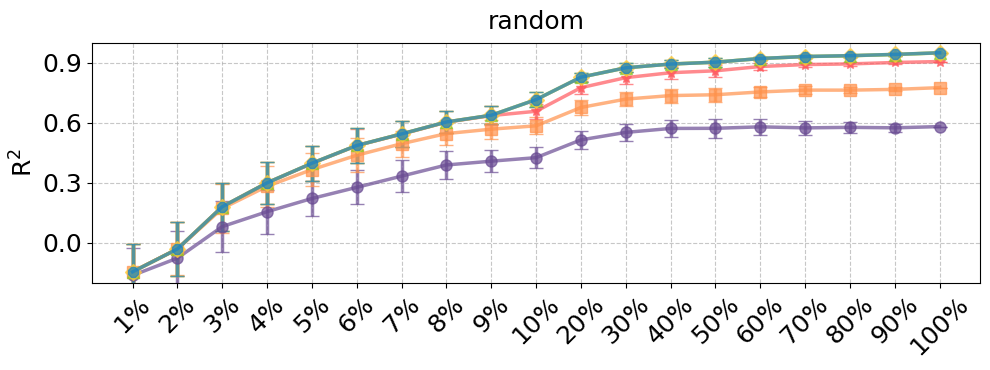

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure ref_tuple is correctly set
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

# Extract means and stds from the dictionaries
res_mean = results_dict.get(ref_tuple + ('random',))['mean']
res_std = results_dict.get(ref_tuple + ('random',))['std']

# Define the new color map based on the provided colors
COLOR_MAP = {
    '2': '#6a4c93',  # Purple
    '4': '#ff924c',  # Peach
    '8': '#ff595e',  # Red
    '16': '#8ac926', # Green
    '32': '#ffca3a', # Yellow
    '64': '#1982c4'  # Blue
}

# Define markers with increased size
MARKER_MAP = {
    '2': 'o',  # Circle
    '4': 's',  # Square
    '8': '*',  # Star
    '16': '^', # Triangle Up
    '32': 'D', # Diamond
    '64': '8'  # Octagon
}

# Ensure the extracted data is valid before proceeding
if res_mean is not None and res_std is not None:
    # Drop non-numeric columns from DataFrames (if needed)
    res_mean = res_mean.select_dtypes(include=[np.number])
    res_std = res_std.select_dtypes(include=[np.number])

    # Create figure for a single plot
    fig, ax = plt.subplots(figsize=(10, 3.8))

    # For each column, plot the mean with the standard deviation as error bars
    for col in res_mean.columns:
        y = res_mean[col]
        y_err = [0.5 * _ for _ in res_std[col]]  # Adjusted error bars

        # Use color and marker mapping
        color = COLOR_MAP.get(str(col), 'black')  # Default to black if no color is found
        marker = MARKER_MAP.get(str(col), 'o')  # Default to circle if no marker is found

        # Plot the data with error bars and transparency
        ax.errorbar(np.arange(len(y)), y, yerr=y_err, label=f"{col}",
                    capsize=5, marker=marker, linestyle='-', markersize=8, linewidth=2.5, color=color, alpha=0.7)

    # Set the custom x-axis labels (in percentage form)

    ax.tick_params(axis='both', labelsize=18)

    # Set the custom x-axis labels (in percentage form)
    custom_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    ax.set_xticks(np.arange(len(custom_labels)))  # Set the tick positions
    ax.set_xticklabels([f"{label}%" for label in custom_labels], fontsize=18,  rotation=45)  # Set custom labels with "%" sign

    ax.set_ylabel("R2", fontsize=18)  # Set Y-axis label size


    ax.set_title("random", fontsize=18, pad=10)
    ax.set_ylim(-0.2, 1.0)  # Set Y-axis range from 0.6 to 0.9
    ax.set_ylabel(F"R$^{2}$", fontsize=18)  # Set the Y-axis label as F1
    ax.set_yticks(list(np.linspace(0, .9, 4)))
    ax.grid(True, linestyle="--", alpha=0.7)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles, labels, title="max depth", title_fontsize=14, fontsize=12,
    #          loc="upper right", bbox_to_anchor=(1.14, 1.06), frameon=False)

    # Adjust layout
    plt.tight_layout()
  #  plt.savefig("R2_random_plot.png", dpi=300, bbox_inches='tight', transparent=False)
    plt.show()
    

else:
    print("Error: Missing required data in results_dict.")


#### TRAIN TIME

In [29]:
name_results_mean = 'TRAIN_TIME_results_exp/mean/'
name_results_std = 'TRAIN_TIME_results_exp/std/'

In [30]:
random_name_mean =  name_results_mean + 'NEW_CORR_KNN_kmeans_class_results/'
random_name_std = name_results_std +  'NEW_CORR_KNN_kmeans_class_results/'

random_name_mean

import pandas as pd

# Initialize an empty dictionary to store the results
results_dict = {}

for feature_type in ['original_feat/', 'only_difference/', 'both_original_and_diff/']:
    name_temp_mean = random_name_mean + feature_type
    name_temp_std = random_name_std + feature_type

    for dataset_size in ['full_dataset/']:
        name_temp_size_mean = name_temp_mean + dataset_size
        name_temp_size_std = name_temp_std + dataset_size

        for fix_strat in ['free/', 'fix_feat/', 'fix_thr/']:
            name_temp_fix_strat_mean = name_temp_size_mean + fix_strat
            name_temp_fix_strat_std = name_temp_size_std + fix_strat

            try:
                # Read the mean and standard deviation tables
                table_mean = pd.read_csv(name_temp_fix_strat_mean + 'res_table.csv')
                table_std = pd.read_csv(name_temp_fix_strat_std + 'res_table.csv')

                # Store in the dictionary using a structured key
                key = (feature_type.strip('/'), dataset_size.strip('/'), fix_strat.strip('/'))
                results_dict[key] = {'mean': table_mean, 'std': table_std}

            except FileNotFoundError as e:
                print(f"File not found: {e}")

# Now `results_dict` contains all loaded DataFrames categorized by feature type, dataset size, and fix strategy.

results_dict = {k + (random_name_mean.split('_')[5],) : v for k, v in results_dict.items()}

In [31]:
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

In [32]:
res_mean = results_dict[ref_tuple + ('KNN',)]['mean']
res_std = results_dict[ref_tuple + ('KNN',)]['std']

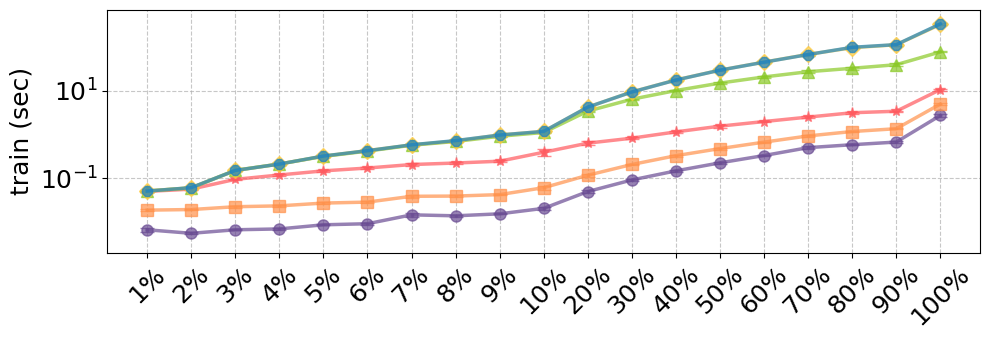

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure ref_tuple is correctly set
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

# Extract means and stds from the dictionaries
res_mean = results_dict.get(ref_tuple + ('KNN',))['mean']
res_std = results_dict.get(ref_tuple + ('KNN',))['std']

# Define the new color map based on the provided colors
COLOR_MAP = {
    '2': '#6a4c93',  # Purple
    '4': '#ff924c',  # Peach
    '8': '#ff595e',  # Red
    '16': '#8ac926', # Green
    '32': '#ffca3a', # Yellow
    '64': '#1982c4'  # Blue
}

# Define markers with increased size
MARKER_MAP = {
    '2': 'o',  # Circle
    '4': 's',  # Square
    '8': '*',  # Star
    '16': '^', # Triangle Up
    '32': 'D', # Diamond
    '64': '8'  # Octagon
}

# Ensure the extracted data is valid before proceeding
if res_mean is not None and res_std is not None:
    # Drop non-numeric columns from DataFrames (if needed)
    res_mean = res_mean.select_dtypes(include=[np.number])
    res_std = res_std.select_dtypes(include=[np.number])

    # Create figure for a single plot
    fig, ax = plt.subplots(figsize=(10, 3.5))

    # For each column, plot the mean with the standard deviation as error bars
    for col in res_mean.columns:
        y = res_mean[col]
        y_err = [0.5 * _ for _ in res_std[col]]  # Adjusted error bars

        # Use color and marker mapping
        color = COLOR_MAP.get(str(col), 'black')  # Default to black if no color is found
        marker = MARKER_MAP.get(str(col), 'o')  # Default to circle if no marker is found

        # Plot the data with error bars and transparency
        ax.errorbar(np.arange(len(y)), y, yerr=y_err, label=f"{col}",
                    capsize=5, marker=marker, linestyle='-', markersize=8, linewidth=2.5, color=color, alpha=0.7)

    # Set the custom x-axis labels (in percentage form)

    ax.tick_params(axis='both', labelsize=18)

    # Set the custom x-axis labels (in percentage form)
    custom_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    ax.set_xticks(np.arange(len(custom_labels)))  # Set the tick positions
    ax.set_xticklabels([f"{label}%" for label in custom_labels], fontsize=18,  rotation=45)  # Set custom labels with "%" sign

    ax.set_ylabel("R2", fontsize=18)  # Set Y-axis label size


    #ax.set_title("center-based clustering", fontsize=38, pad=10)
    ax.set_yscale("log")
    ax.set_ylim(.002, 700)  # Set Y-axis range from 0.6 to 0.9
    ax.set_ylabel("train (sec)", fontsize=18)  # Set the Y-axis label as F1
    ax.grid(True, linestyle="--", alpha=0.7)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles, labels, title="max depth", title_fontsize=14, fontsize=12,
    #          loc="upper right", bbox_to_anchor=(1.14, 1.06), frameon=False)

    # Adjust layout
    plt.tight_layout()
   # plt.savefig("train_time_centroid_plot.png", dpi=300, bbox_inches='tight', transparent=False)
    plt.show()
    

else:
    print("Error: Missing required data in results_dict.")


In [34]:
random_name_mean =  name_results_mean + 'NEW_CORR_KNN_random_results/'
random_name_std = name_results_std +  'NEW_CORR_KNN_random_results/'

random_name_mean

import pandas as pd

# Initialize an empty dictionary to store the results
results_dict = {}

for feature_type in ['original_feat/', 'only_difference/', 'both_original_and_diff/']:
    name_temp_mean = random_name_mean + feature_type
    name_temp_std = random_name_std + feature_type

    for dataset_size in ['full_dataset/']:
        name_temp_size_mean = name_temp_mean + dataset_size
        name_temp_size_std = name_temp_std + dataset_size

        for fix_strat in ['free/', 'fix_feat/', 'fix_thr/']:
            name_temp_fix_strat_mean = name_temp_size_mean + fix_strat
            name_temp_fix_strat_std = name_temp_size_std + fix_strat

            try:
                # Read the mean and standard deviation tables
                table_mean = pd.read_csv(name_temp_fix_strat_mean + 'res_table.csv')
                table_std = pd.read_csv(name_temp_fix_strat_std + 'res_table.csv')

                # Store in the dictionary using a structured key
                key = (feature_type.strip('/'), dataset_size.strip('/'), fix_strat.strip('/'))
                results_dict[key] = {'mean': table_mean, 'std': table_std}

            except FileNotFoundError as e:
                print(f"File not found: {e}")

# Now `results_dict` contains all loaded DataFrames categorized by feature type, dataset size, and fix strategy.

results_dict = {k + (random_name_mean.split('_')[5],) : v for k, v in results_dict.items()}

In [35]:
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

In [36]:
res_mean = results_dict[ref_tuple + ('KNN',)]['mean']
res_std = results_dict[ref_tuple + ('KNN',)]['std']

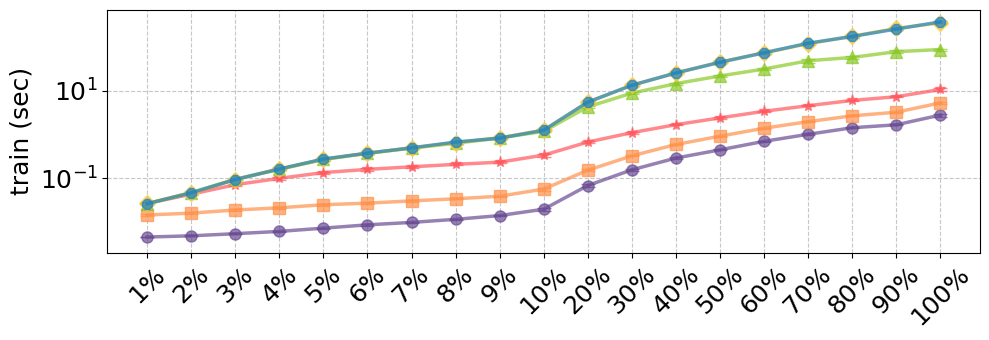

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure ref_tuple is correctly set
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

# Extract means and stds from the dictionaries
res_mean = results_dict.get(ref_tuple + ('KNN',))['mean']
res_std = results_dict.get(ref_tuple + ('KNN',))['std']

# Define the new color map based on the provided colors
COLOR_MAP = {
    '2': '#6a4c93',  # Purple
    '4': '#ff924c',  # Peach
    '8': '#ff595e',  # Red
    '16': '#8ac926', # Green
    '32': '#ffca3a', # Yellow
    '64': '#1982c4'  # Blue
}

# Define markers with increased size
MARKER_MAP = {
    '2': 'o',  # Circle
    '4': 's',  # Square
    '8': '*',  # Star
    '16': '^', # Triangle Up
    '32': 'D', # Diamond
    '64': '8'  # Octagon
}

# Ensure the extracted data is valid before proceeding
if res_mean is not None and res_std is not None:
    # Drop non-numeric columns from DataFrames (if needed)
    res_mean = res_mean.select_dtypes(include=[np.number])
    res_std = res_std.select_dtypes(include=[np.number])

    # Create figure for a single plot
    fig, ax = plt.subplots(figsize=(10, 3.5))

    # For each column, plot the mean with the standard deviation as error bars
    for col in res_mean.columns:
        y = res_mean[col]
        y_err = [0.5 * _ for _ in res_std[col]]  # Adjusted error bars

        # Use color and marker mapping
        color = COLOR_MAP.get(str(col), 'black')  # Default to black if no color is found
        marker = MARKER_MAP.get(str(col), 'o')  # Default to circle if no marker is found

        # Plot the data with error bars and transparency
        ax.errorbar(np.arange(len(y)), y, yerr=y_err, label=f"{col}",
                    capsize=5, marker=marker, linestyle='-', markersize=8, linewidth=2.5, color=color, alpha=0.7)

    # Set the custom x-axis labels (in percentage form)

    ax.tick_params(axis='both', labelsize=18)

    # Set the custom x-axis labels (in percentage form)
    custom_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    ax.set_xticks(np.arange(len(custom_labels)))  # Set the tick positions
    ax.set_xticklabels([f"{label}%" for label in custom_labels], fontsize=18,  rotation=45)  # Set custom labels with "%" sign

    ax.set_ylabel("R2", fontsize=18)  # Set Y-axis label size


    #ax.set_title("random", fontsize=38, pad=10)
    ax.set_yscale("log")
    ax.set_ylim(.002, 700)  # Set Y-axis range from 0.6 to 0.9
    ax.set_ylabel("train (sec)", fontsize=18)  # Set the Y-axis label as F1
    ax.grid(True, linestyle="--", alpha=0.7)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles, labels, title="max depth", title_fontsize=14, fontsize=12,
    #          loc="upper right", bbox_to_anchor=(1.14, 1.06), frameon=False)

    plt.yscale("log")
    # Adjust layout
    plt.tight_layout()
    #plt.savefig("train_time_random_plot.png", dpi=300, bbox_inches='tight', transparent=False)
    plt.show()
    

else:
    print("Error: Missing required data in results_dict.")


#### TIME TESTING

In [38]:
name_results_mean = 'TEST_TIME_results_exp/mean/'
name_results_std = 'TEST_TIME_results_exp/std/'

In [39]:
random_name_mean =  name_results_mean + 'NEW_CORR_KNN_kmeans_class_results/'
random_name_std = name_results_std +  'NEW_CORR_KNN_kmeans_class_results/'

random_name_mean

import pandas as pd

# Initialize an empty dictionary to store the results
results_dict = {}

for feature_type in ['original_feat/', 'only_difference/', 'both_original_and_diff/']:
    name_temp_mean = random_name_mean + feature_type
    name_temp_std = random_name_std + feature_type

    for dataset_size in ['full_dataset/']:
        name_temp_size_mean = name_temp_mean + dataset_size
        name_temp_size_std = name_temp_std + dataset_size

        for fix_strat in ['free/', 'fix_feat/', 'fix_thr/']:
            name_temp_fix_strat_mean = name_temp_size_mean + fix_strat
            name_temp_fix_strat_std = name_temp_size_std + fix_strat

            try:
                # Read the mean and standard deviation tables
                table_mean = pd.read_csv(name_temp_fix_strat_mean + 'res_table.csv')
                table_std = pd.read_csv(name_temp_fix_strat_std + 'res_table.csv')

                
                # Store in the dictionary using a structured key
                key = (feature_type.strip('/'), dataset_size.strip('/'), fix_strat.strip('/'))
                results_dict[key] = {'mean': table_mean, 'std': table_std}

            except FileNotFoundError as e:
                print(f"File not found: {e}")

# Now `results_dict` contains all loaded DataFrames categorized by feature type, dataset size, and fix strategy.

results_dict = {k + (random_name_mean.split('_')[5],) : v for k, v in results_dict.items()}

In [40]:
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

In [41]:
res_mean = results_dict[ref_tuple + ('KNN',)]['mean']
res_std = results_dict[ref_tuple + ('KNN',)]['std']

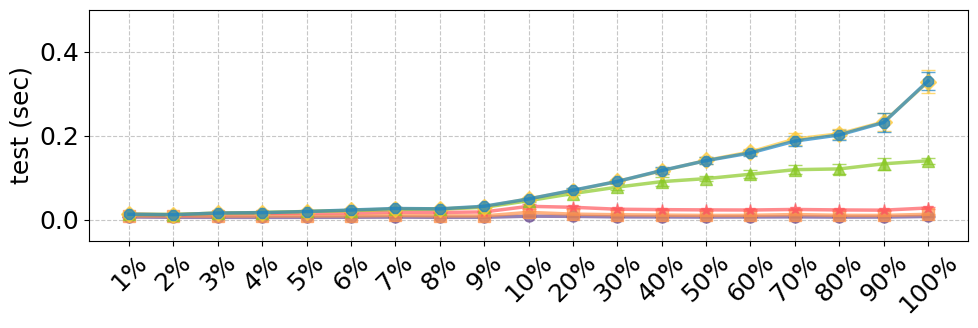

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Set global font size and figure size
plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = (12, 5)  # Keep the size for the plot

# Ensure ref_tuple is correctly set
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

# Extract means and stds from the dictionaries
res_mean = results_dict.get(ref_tuple + ('KNN',))['mean']
res_std = results_dict.get(ref_tuple + ('KNN',))['std']

# Define the new color map based on the provided colors
COLOR_MAP = {
    '2': '#6a4c93',  # Purple
    '4': '#ff924c',  # Peach
    '8': '#ff595e',  # Red
    '16': '#8ac926', # Green
    '32': '#ffca3a', # Yellow
    '64': '#1982c4'  # Blue
}

# Define markers with increased size
MARKER_MAP = {
    '2': 'o',  # Circle
    '4': 's',  # Square
    '8': '*',  # Star
    '16': '^', # Triangle Up
    '32': 'D', # Diamond
    '64': '8'  # Octagon
}

# Ensure the extracted data is valid before proceeding
if res_mean is not None and res_std is not None:
    # Drop non-numeric columns from DataFrames (if needed)
    res_mean = res_mean.select_dtypes(include=[np.number])
    res_std = res_std.select_dtypes(include=[np.number])

    # Create figure for a single plot
    fig, ax = plt.subplots(figsize=(10, 3.5))

    # For each column, plot the mean with the standard deviation as error bars
    for col in res_mean.columns:
        y = res_mean[col]
        y_err = [0.5 * _ for _ in res_std[col]]  # Adjusted error bars

        # Use color and marker mapping
        color = COLOR_MAP.get(str(col), 'black')  # Default to black if no color is found
        marker = MARKER_MAP.get(str(col), 'o')  # Default to circle if no marker is found

        # Plot the data with error bars and transparency
        ax.errorbar(np.arange(len(y)), y, yerr=y_err, label=f"{col}",
                    capsize=5, marker=marker, linestyle='-', markersize=8, linewidth=2.5, color=color, alpha=0.7)

    # Set the custom x-axis labels (in percentage form)

    ax.tick_params(axis='both', labelsize=18)

    # Set the custom x-axis labels (in percentage form)
    custom_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    ax.set_xticks(np.arange(len(custom_labels)))  # Set the tick positions
    ax.set_xticklabels([f"{label}%" for label in custom_labels], fontsize=18,  rotation=45)  # Set custom labels with "%" sign

    ax.set_ylabel("R2", fontsize=18)  # Set Y-axis label size


    #ax.set_title("center-based clustering", fontsize=38, pad=10)
    ax.set_ylim(-0.05, 0.5)  # Set Y-axis range from 0.6 to 0.9
    ax.set_ylabel("test (sec)", fontsize=18)  # Set the Y-axis label as F1
    ax.grid(True, linestyle="--", alpha=0.7)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles, labels, title="max depth", title_fontsize=14, fontsize=12,
    #          loc="upper right", bbox_to_anchor=(1.14, 1.06), frameon=False)

    # Adjust layout
    plt.tight_layout()
  # plt.savefig("test_time_centroid_plot.png", dpi=300, bbox_inches='tight', transparent=False)
    plt.show()
    

else:
    print("Error: Missing required data in results_dict.")


In [43]:
random_name_mean =  name_results_mean + 'NEW_CORR_KNN_random_results/'
random_name_std = name_results_std +  'NEW_CORR_KNN_random_results/'

random_name_mean

import pandas as pd

# Initialize an empty dictionary to store the results
results_dict = {}

for feature_type in ['original_feat/', 'only_difference/', 'both_original_and_diff/']:
    name_temp_mean = random_name_mean + feature_type
    name_temp_std = random_name_std + feature_type

    for dataset_size in ['full_dataset/']:
        name_temp_size_mean = name_temp_mean + dataset_size
        name_temp_size_std = name_temp_std + dataset_size

        for fix_strat in ['free/', 'fix_feat/', 'fix_thr/']:
            name_temp_fix_strat_mean = name_temp_size_mean + fix_strat
            name_temp_fix_strat_std = name_temp_size_std + fix_strat

            try:
                # Read the mean and standard deviation tables
                table_mean = pd.read_csv(name_temp_fix_strat_mean + 'res_table.csv')
                table_std = pd.read_csv(name_temp_fix_strat_std + 'res_table.csv')

        
                # Store in the dictionary using a structured key
                key = (feature_type.strip('/'), dataset_size.strip('/'), fix_strat.strip('/'))
                results_dict[key] = {'mean': table_mean, 'std': table_std}

            except FileNotFoundError as e:
                print(f"File not found: {e}")

# Now `results_dict` contains all loaded DataFrames categorized by feature type, dataset size, and fix strategy.

results_dict = {k + (random_name_mean.split('_')[5],) : v for k, v in results_dict.items()}

In [44]:
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

In [45]:
res_mean = results_dict[ref_tuple + ('KNN',)]['mean']
res_std = results_dict[ref_tuple + ('KNN',)]['std']

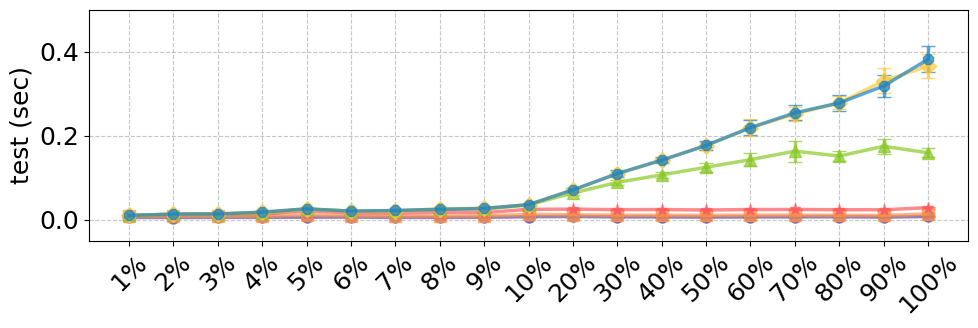

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Set global font size and figure size
plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = (12, 5)  # Keep the size for the plot

# Ensure ref_tuple is correctly set
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

# Extract means and stds from the dictionaries
res_mean = results_dict.get(ref_tuple + ('KNN',))['mean']
res_std = results_dict.get(ref_tuple + ('KNN',))['std']

# Define the new color map based on the provided colors
COLOR_MAP = {
    '2': '#6a4c93',  # Purple
    '4': '#ff924c',  # Peach
    '8': '#ff595e',  # Red
    '16': '#8ac926', # Green
    '32': '#ffca3a', # Yellow
    '64': '#1982c4'  # Blue
}

# Define markers with increased size
MARKER_MAP = {
    '2': 'o',  # Circle
    '4': 's',  # Square
    '8': '*',  # Star
    '16': '^', # Triangle Up
    '32': 'D', # Diamond
    '64': '8'  # Octagon
}

# Ensure the extracted data is valid before proceeding
if res_mean is not None and res_std is not None:
    # Drop non-numeric columns from DataFrames (if needed)
    res_mean = res_mean.select_dtypes(include=[np.number])
    res_std = res_std.select_dtypes(include=[np.number])

    # Create figure for a single plot
    fig, ax = plt.subplots(figsize=(10, 3.5))

    # For each column, plot the mean with the standard deviation as error bars
    for col in res_mean.columns:
        y = res_mean[col]
        y_err = [0.5 * _ for _ in res_std[col]]  # Adjusted error bars

        # Use color and marker mapping
        color = COLOR_MAP.get(str(col), 'black')  # Default to black if no color is found
        marker = MARKER_MAP.get(str(col), 'o')  # Default to circle if no marker is found

        # Plot the data with error bars and transparency
        ax.errorbar(np.arange(len(y)), y, yerr=y_err, label=f"{col}",
                    capsize=5, marker=marker, linestyle='-', markersize=8, linewidth=2.5, color=color, alpha=0.7)

    # Set the custom x-axis labels (in percentage form)

    ax.tick_params(axis='both', labelsize=18)

    # Set the custom x-axis labels (in percentage form)
    custom_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    ax.set_xticks(np.arange(len(custom_labels)))  # Set the tick positions
    ax.set_xticklabels([f"{label}%" for label in custom_labels], fontsize=18,  rotation=45)  # Set custom labels with "%" sign

    ax.set_ylabel("R2", fontsize=18)  # Set Y-axis label size


    #ax.set_title("random", fontsize=38, pad=10)
    ax.set_ylim(-0.05, 0.5)  # Set Y-axis range from 0.6 to 0.9
    ax.set_ylabel("test (sec)", fontsize=18)  # Set the Y-axis label as F1
    ax.grid(True, linestyle="--", alpha=0.7)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles, labels, title="max depth", title_fontsize=38, fontsize=34,
    #     bbox_to_anchor=(2, 2), frameon=False, markerscale=1.8, ncol=6,
    #     loc='center')


    # Adjust layout
    plt.tight_layout()
  #  plt.savefig("test_time_random_plot.png", dpi=300, bbox_inches='tight', transparent=False)
    plt.show()
    

else:
    print("Error: Missing required data in results_dict.")


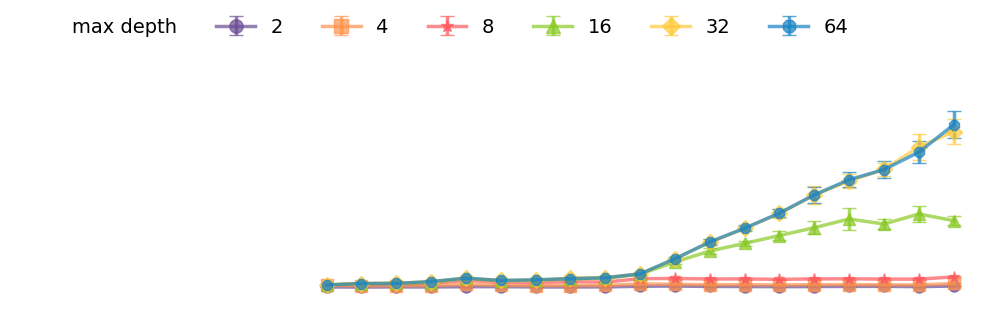

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Set global font size and figure size
plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = (12, 5)  # Keep the size for the plot

# Ensure ref_tuple is correctly set
ref_tuple = ('both_original_and_diff', 'full_dataset', 'fix_thr')

# Extract means and stds from the dictionaries
res_mean = results_dict.get(ref_tuple + ('KNN',))['mean']
res_std = results_dict.get(ref_tuple + ('KNN',))['std']

# Define the new color map based on the provided colors
COLOR_MAP = {
    '2': '#6a4c93',  # Purple
    '4': '#ff924c',  # Peach
    '8': '#ff595e',  # Red
    '16': '#8ac926', # Green
    '32': '#ffca3a', # Yellow
    '64': '#1982c4'  # Blue
}

# Define markers with increased size
MARKER_MAP = {
    '2': 'o',  # Circle
    '4': 's',  # Square
    '8': '*',  # Star
    '16': '^', # Triangle Up
    '32': 'D', # Diamond
    '64': '8'  # Octagon
}

# Ensure the extracted data is valid before proceeding
if res_mean is not None and res_std is not None:
    # Drop non-numeric columns from DataFrames (if needed)
    res_mean = res_mean.select_dtypes(include=[np.number])
    res_std = res_std.select_dtypes(include=[np.number])

    # Create figure for a single plot
    fig, ax = plt.subplots(figsize=(10, 3.5))

    # For each column, plot the mean with the standard deviation as error bars
    for col in res_mean.columns:
        y = res_mean[col]
        y_err = [0.5 * _ for _ in res_std[col]]  # Adjusted error bars

        # Use color and marker mapping
        color = COLOR_MAP.get(str(col), 'black')  # Default to black if no color is found
        marker = MARKER_MAP.get(str(col), 'o')  # Default to circle if no marker is found

        # Plot the data with error bars and transparency
        ax.errorbar(np.arange(len(y)), y, yerr=y_err, label=f"{col}",
                    capsize=5, marker=marker, linestyle='-', markersize=8, linewidth=2.5, color=color, alpha=0.7)

    # Set the custom x-axis labels (in percentage form)

    ax.tick_params(axis='both', labelsize=18)

    # Set the custom x-axis labels (in percentage form)
    custom_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    ax.set_xticks(np.arange(len(custom_labels)))  # Set the tick positions
    ax.set_xticklabels([f"{label}%" for label in custom_labels], fontsize=18,  rotation=45)  # Set custom labels with "%" sign

    ax.set_ylabel("R2", fontsize=18)  # Set Y-axis label size


    #ax.set_title("random", fontsize=38, pad=10)
    ax.set_ylim(-0.05, 0.5)  # Set Y-axis range from 0.6 to 0.9
    ax.set_ylabel("test (s)", fontsize=18)  # Set the Y-axis label as F1
    ax.grid(True, linestyle="--", alpha=0.7)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title="max depth", title_fontsize=18, fontsize=18,
         bbox_to_anchor=(.2, 1.2), frameon=False, markerscale=1.2, ncol=6,
         loc='center')

    h, l = ax.get_legend_handles_labels()
    ph = [plt.plot([],marker="", ls="")[0]]
    handles = ph + h
    labels = ["max depth"] + l  
    plt.legend(handles, labels, ncol=7, frameon=False, markerscale=1.2, bbox_to_anchor=(.2, 1.2), loc='center')
    ax.axis("off")

    # Adjust layout
    plt.tight_layout()
  #  plt.savefig("legend.png", dpi=600, bbox_inches='tight', transparent=False)
    plt.show()
    

else:
    print("Error: Missing required data in results_dict.")


In [ ]:
random_name_mean =  name_results_mean + 'NEW_CORR_KNN_kmeans_class_results/'
random_name_std = name_results_std +  'NEW_CORR_KNN_kmeans_class_results/'

In [ ]:
random_name_mean

In [ ]:
import pandas as pd

# Initialize an empty dictionary to store the results
results_dict = {}

for feature_type in ['original_feat/', 'only_difference/', 'both_original_and_diff/']:
    name_temp_mean = random_name_mean + feature_type
    name_temp_std = random_name_std + feature_type

    for dataset_size in ['full_dataset/', 'subsample_dataset/']:
        name_temp_size_mean = name_temp_mean + dataset_size
        name_temp_size_std = name_temp_std + dataset_size

        for fix_strat in ['free/', 'fix_feat/', 'fix_thr/']:
            name_temp_fix_strat_mean = name_temp_size_mean + fix_strat
            name_temp_fix_strat_std = name_temp_size_std + fix_strat

            try:
                # Read the mean and standard deviation tables
                table_mean = pd.read_csv(name_temp_fix_strat_mean + 'res_table.csv')
                table_std = pd.read_csv(name_temp_fix_strat_std + 'res_table.csv')

                table_mean = table_mean.drop(columns = [str(x) for x in [3,5,6,7]])
                table_std = table_std.drop(columns= [str(x) for x in [3,5,6,7]])
                
                # Store in the dictionary using a structured key
                key = (feature_type.strip('/'), dataset_size.strip('/'), fix_strat.strip('/'))
                results_dict[key] = {'mean': table_mean, 'std': table_std}

            except FileNotFoundError as e:
                print(f"File not found: {e}")

# Now `results_dict` contains all loaded DataFrames categorized by feature type, dataset size, and fix strategy.

results_dict = {k + (random_name_mean.split('_')[5],) : v for k, v in results_dict.items()}

In [ ]:
list(results_dict.keys())

In [ ]:
# Function to replace parts of the key with shorter names
def shorten_key(key_tuple):
    replacements = {
        "both_original_and_diff": "F1-both",
        "only_difference": "F1-only_dif",
        "original_feat": "F1-feat"
    }
    return tuple(replacements.get(k, k) for k in key_tuple)

# Create a new dictionary with shortened keys
results_dict = {shorten_key(k): v for k, v in results_dict.items()}

# Print to verify
print(list(results_dict.keys()))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_three_means_with_error(mean_std_list, titles, value_line = f1_bestknn):
    """
    Plots three mean datasets with error bars in a single row of subplots.
    Also adds a horizontal red line for reference.

    Parameters:
    - mean_std_list: List of tuples [(mean_df1, std_df1), (mean_df2, std_df2), (mean_df3, std_df3)]
    - titles: List of titles for each subplot
    - value_line: A float value to plot a horizontal reference line
    """
    fig, axes = plt.subplots(1, 3, figsize=(24, 9), sharey=True)  # Increased figure size

    for i, ((mean_df, std_df), title) in enumerate(zip(mean_std_list, titles)):
        #display(mean_df)
        ax = axes[i]
        for col in mean_df.columns:
            #print(col)
            x = np.arange(len(mean_df))  # Percentage indices as x-axis
            #print(x)
            x_transformed = (x + 1) * 10  # Transform x-axis values
            y = mean_df[col]  # Mean values
            y_err = std_df[col]  # Standard deviation values
            
            ax.errorbar(x, y, yerr=y_err, label=f"Max Depth {col}", capsize=5, marker='o', linestyle='-', markersize=7, linewidth=2)

        # Add a horizontal red line for value_line
        ax.axhline(y=value_line, color='red', linestyle='--', linewidth=2, label=f"$k$-NN ($k=5$)")

        ax.set_xlabel("Percentage (%)", fontsize=20)
        if i == 0:
            ax.set_ylabel("Mean Value", fontsize=20)
        ax.set_title(title, fontsize=22, pad=15)
        
        ax.set_xticks(x)
        ax.set_xticklabels([f"{val}%" for val in x_transformed], fontsize=18)  # Apply transformation and labels
        ax.tick_params(axis='both', labelsize=18)  # Increase tick size
        ax.grid(True, linestyle="--", alpha=0.7)

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)  

    # Add a shared legend outside the figure
    handles, labels = axes[-1].get_legend_handles_labels()
    fig.legend(handles, labels, title="Max Depth", title_fontsize=20, fontsize=18,
               loc="upper right", bbox_to_anchor=(1.12, 1.02))  

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_three_means_with_error([(mean_df1, std_df1), (mean_df2, std_df2), (mean_df3, std_df3)], ["Title 1", "Title 2", "Title 3"], f1_bestknn)


In [ ]:
# Process three datasets at a time

filtered_results_dict = {key: value for key, value in results_dict.items() if 'full_dataset' in key}


filtered_results_dict = {
    key: {
        'mean': value['mean'].select_dtypes(include=[np.number]),  # Keep only numeric columns
        'std': value['std'].select_dtypes(include=[np.number])  # Keep only numeric columns
    }
    for key, value in results_dict.items() if 'full_dataset' in key
}




keys_list = list(filtered_results_dict.keys())

for i in range(0, len(keys_list), 3):
    batch_keys = keys_list[i:i+3]  # Get the next three keys
    batch_values_mean_std_list = [(filtered_results_dict[k]['mean'], filtered_results_dict[k]['std']) for k in batch_keys]
    plot_three_means_with_error(batch_values_mean_std_list,batch_keys)
  
    print(batch_keys)
    

    

In [ ]:
# Process three datasets at a time
filtered_results_dict = {key: value for key, value in results_dict.items() if 'subsample_dataset' in key}

filtered_results_dict = {
    key: {
        'mean': value['mean'].select_dtypes(include=[np.number]),  # Keep only numeric columns
        'std': value['std'].select_dtypes(include=[np.number])  # Keep only numeric columns
    }
    for key, value in results_dict.items() if 'subsample_dataset' in key
}




keys_list = list(filtered_results_dict.keys())

for i in range(0, len(keys_list), 3):
    batch_keys = keys_list[i:i+3]  # Get the next three keys
    batch_values_mean_std_list = [(filtered_results_dict[k]['mean'], filtered_results_dict[k]['std']) for k in batch_keys]
    plot_three_means_with_error(batch_values_mean_std_list,batch_keys)
  
    print(batch_keys)
    

    

In [ ]:
random_name_mean =  name_results_mean + 'NEW_CORR_KNN_random_results/'
random_name_std = name_results_std +  'NEW_CORR_KNN_random_results/'

In [ ]:
random_name_mean

In [ ]:
import pandas as pd

# Initialize an empty dictionary to store the results
results_dict = {}

for feature_type in ['original_feat/', 'only_difference/', 'both_original_and_diff/']:
    name_temp_mean = random_name_mean + feature_type
    name_temp_std = random_name_std + feature_type

    for dataset_size in ['full_dataset/', 'subsample_dataset/']:
        name_temp_size_mean = name_temp_mean + dataset_size
        name_temp_size_std = name_temp_std + dataset_size

        for fix_strat in ['free/', 'fix_feat/', 'fix_thr/']:
            name_temp_fix_strat_mean = name_temp_size_mean + fix_strat
            name_temp_fix_strat_std = name_temp_size_std + fix_strat

            try:
                # Read the mean and standard deviation tables
                table_mean = pd.read_csv(name_temp_fix_strat_mean + 'res_table.csv')
                table_std = pd.read_csv(name_temp_fix_strat_std + 'res_table.csv')

                # Drop specified columns
                cols_to_drop = [str(x) for x in [3, 5, 6, 7]]
                table_mean = table_mean.drop(columns=cols_to_drop, errors='ignore')
                table_std = table_std.drop(columns=cols_to_drop, errors='ignore')

                # Set all numeric column values of `table_std` to 0 for rows where `perc_ == 1.0`
                if 'perc_' in table_std.columns:
                    numeric_cols = table_std.select_dtypes(include=['number']).columns
                    table_std.loc[table_std['perc_'] == 1.0, numeric_cols] = 0

                # Store in the dictionary using a structured key
                key = (feature_type.strip('/'), dataset_size.strip('/'), fix_strat.strip('/'))
                results_dict[key] = {'mean': table_mean, 'std': table_std}

            except FileNotFoundError as e:
                print(f"File not found: {e}")

# Update dictionary keys to include the 6th part of `random_name_mean` when split by '_'
exp_identifier = random_name_mean.split('_')[5] if len(random_name_mean.split('_')) > 5 else 'unknown'
results_dict = {k + (exp_identifier,): v for k, v in results_dict.items()}


In [ ]:
list(results_dict.keys())

In [ ]:
# Function to replace parts of the key with shorter names
def shorten_key(key_tuple):
    replacements = {
        "both_original_and_diff": "F1-both",
        "only_difference": "F1-only_dif",
        "original_feat": "F1-feat"
    }
    return tuple(replacements.get(k, k) for k in key_tuple)

# Create a new dictionary with shortened keys
results_dict = {shorten_key(k): v for k, v in results_dict.items()}

# Print to verify
print(list(results_dict.keys()))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_three_means_with_error(mean_std_list, titles, value_line = f1_bestknn):
    """
    Plots three mean datasets with error bars in a single row of subplots.
    Also adds a horizontal red line for reference.

    Parameters:
    - mean_std_list: List of tuples [(mean_df1, std_df1), (mean_df2, std_df2), (mean_df3, std_df3)]
    - titles: List of titles for each subplot
    - value_line: A float value to plot a horizontal reference line
    """
    fig, axes = plt.subplots(1, 3, figsize=(24, 9), sharey=True)  # Increased figure size

    for i, ((mean_df, std_df), title) in enumerate(zip(mean_std_list, titles)):
        #display(mean_df)
        ax = axes[i]
        for col in mean_df.columns:
            #print(col)
            x = np.arange(len(mean_df))  # Percentage indices as x-axis
            #print(x)
            x_transformed = (x + 1) * 10  # Transform x-axis values
            y = mean_df[col]  # Mean values
            y_err = std_df[col]  # Standard deviation values
            
            ax.errorbar(x, y, yerr=y_err, label=f"Max Depth {col}", capsize=5, marker='o', linestyle='-', markersize=7, linewidth=2)

        # Add a horizontal red line for value_line
        ax.axhline(y=value_line, color='red', linestyle='--', linewidth=2, label=f"$k$-NN ($k=5$)")

        ax.set_xlabel("Percentage (%)", fontsize=20)
        if i == 0:
            ax.set_ylabel("Mean Value", fontsize=20)
        ax.set_title(title, fontsize=22, pad=15)
        
        ax.set_xticks(x)
        ax.set_xticklabels([f"{val}%" for val in x_transformed], fontsize=18)  # Apply transformation and labels
        ax.tick_params(axis='both', labelsize=18)  # Increase tick size
        ax.grid(True, linestyle="--", alpha=0.7)

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)  

    # Add a shared legend outside the figure
    handles, labels = axes[-1].get_legend_handles_labels()
    fig.legend(handles, labels, title="Max Depth", title_fontsize=20, fontsize=18,
               loc="upper right", bbox_to_anchor=(1.12, 1.02))  

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_three_means_with_error([(mean_df1, std_df1), (mean_df2, std_df2), (mean_df3, std_df3)], ["Title 1", "Title 2", "Title 3"], f1_bestknn)


In [ ]:
# Process three datasets at a time

filtered_results_dict = {key: value for key, value in results_dict.items() if 'full_dataset' in key}


filtered_results_dict = {
    key: {
        'mean': value['mean'].select_dtypes(include=[np.number]),  # Keep only numeric columns
        'std': value['std'].select_dtypes(include=[np.number])  # Keep only numeric columns
    }
    for key, value in results_dict.items() if 'full_dataset' in key
}




keys_list = list(filtered_results_dict.keys())

for i in range(0, len(keys_list), 3):
    batch_keys = keys_list[i:i+3]  # Get the next three keys
    batch_values_mean_std_list = [(filtered_results_dict[k]['mean'], filtered_results_dict[k]['std']) for k in batch_keys]
    plot_three_means_with_error(batch_values_mean_std_list,batch_keys)
  
    print(batch_keys)
    

    

In [ ]:
# Process three datasets at a time
filtered_results_dict = {key: value for key, value in results_dict.items() if 'subsample_dataset' in key}

filtered_results_dict = {
    key: {
        'mean': value['mean'].select_dtypes(include=[np.number]),  # Keep only numeric columns
        'std': value['std'].select_dtypes(include=[np.number])  # Keep only numeric columns
    }
    for key, value in results_dict.items() if 'subsample_dataset' in key
}




keys_list = list(filtered_results_dict.keys())

for i in range(0, len(keys_list), 3):
    batch_keys = keys_list[i:i+3]  # Get the next three keys
    batch_values_mean_std_list = [(filtered_results_dict[k]['mean'], filtered_results_dict[k]['std']) for k in batch_keys]
    plot_three_means_with_error(batch_values_mean_std_list,batch_keys)
  
    print(batch_keys)
    

    

#### KMEANS

In [ ]:
random_name_mean =  name_results_mean + 'NEW_CORR_KNN_stratrand_results/'
random_name_std = name_results_std +  'NEW_CORR_KNN_stratrand_results/'

In [ ]:
random_name_mean

In [ ]:
import pandas as pd

# Initialize an empty dictionary to store the results
results_dict = {}

for feature_type in ['original_feat/', 'only_difference/', 'both_original_and_diff/']:
    name_temp_mean = random_name_mean + feature_type
    name_temp_std = random_name_std + feature_type

    for dataset_size in ['full_dataset/', 'subsample_dataset/']:
        name_temp_size_mean = name_temp_mean + dataset_size
        name_temp_size_std = name_temp_std + dataset_size

        for fix_strat in ['free/', 'fix_feat/', 'fix_thr/']:
            name_temp_fix_strat_mean = name_temp_size_mean + fix_strat
            name_temp_fix_strat_std = name_temp_size_std + fix_strat

            try:
                # Read the mean and standard deviation tables
                table_mean = pd.read_csv(name_temp_fix_strat_mean + 'res_table.csv')
                table_std = pd.read_csv(name_temp_fix_strat_std + 'res_table.csv')
                
                # Store in the dictionary using a structured key
                key = (feature_type.strip('/'), dataset_size.strip('/'), fix_strat.strip('/'))
                results_dict[key] = {'mean': table_mean, 'std': table_std}

            except FileNotFoundError as e:
                print(f"File not found: {e}")

# Now `results_dict` contains all loaded DataFrames categorized by feature type, dataset size, and fix strategy.

results_dict = {k + (random_name_mean.split('_')[5],) : v for k, v in results_dict.items()}

In [ ]:
list(results_dict.keys())

In [ ]:
# Function to replace parts of the key with shorter names
def shorten_key(key_tuple):
    replacements = {
        "both_original_and_diff": "F1-both",
        "only_difference": "F1-only_dif",
        "original_feat": "F1-feat"
    }
    return tuple(replacements.get(k, k) for k in key_tuple)

# Create a new dictionary with shortened keys
results_dict = {shorten_key(k): v for k, v in results_dict.items()}

# Print to verify
print(list(results_dict.keys()))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_three_means_with_error(mean_std_list, titles, value_line = f1_bestknn):
    """
    Plots three mean datasets with error bars in a single row of subplots.
    Also adds a horizontal red line for reference.

    Parameters:
    - mean_std_list: List of tuples [(mean_df1, std_df1), (mean_df2, std_df2), (mean_df3, std_df3)]
    - titles: List of titles for each subplot
    - value_line: A float value to plot a horizontal reference line
    """
    fig, axes = plt.subplots(1, 3, figsize=(24, 9), sharey=True)  # Increased figure size

    for i, ((mean_df, std_df), title) in enumerate(zip(mean_std_list, titles)):
        #display(mean_df)
        ax = axes[i]
        for col in mean_df.columns:
            #print(col)
            x = np.arange(len(mean_df))  # Percentage indices as x-axis
            #print(x)
            x_transformed = (x + 1) * 10  # Transform x-axis values
            y = mean_df[col]  # Mean values
            y_err = std_df[col]  # Standard deviation values
            
            ax.errorbar(x, y, yerr=y_err, label=f"Max Depth {col}", capsize=5, marker='o', linestyle='-', markersize=7, linewidth=2)

        # Add a horizontal red line for value_line
        ax.axhline(y=value_line, color='red', linestyle='--', linewidth=2, label=f"$k$-NN ($k=5$)")

        ax.set_xlabel("Percentage (%)", fontsize=20)
        if i == 0:
            ax.set_ylabel("Mean Value", fontsize=20)
        ax.set_title(title, fontsize=22, pad=15)
        
        ax.set_xticks(x)
        ax.set_xticklabels([f"{val}%" for val in x_transformed], fontsize=18)  # Apply transformation and labels
        ax.tick_params(axis='both', labelsize=18)  # Increase tick size
        ax.grid(True, linestyle="--", alpha=0.7)

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)  

    # Add a shared legend outside the figure
    handles, labels = axes[-1].get_legend_handles_labels()
    fig.legend(handles, labels, title="Max Depth", title_fontsize=20, fontsize=18,
               loc="upper right", bbox_to_anchor=(1.12, 1.02))  

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_three_means_with_error([(mean_df1, std_df1), (mean_df2, std_df2), (mean_df3, std_df3)], ["Title 1", "Title 2", "Title 3"], f1_bestknn)


In [ ]:
# Process three datasets at a time

filtered_results_dict = {key: value for key, value in results_dict.items() if 'full_dataset' in key}


filtered_results_dict = {
    key: {
        'mean': value['mean'].select_dtypes(include=[np.number]),  # Keep only numeric columns
        'std': value['std'].select_dtypes(include=[np.number])  # Keep only numeric columns
    }
    for key, value in results_dict.items() if 'full_dataset' in key
}




keys_list = list(filtered_results_dict.keys())

for i in range(0, len(keys_list), 3):
    batch_keys = keys_list[i:i+3]  # Get the next three keys
    batch_values_mean_std_list = [(filtered_results_dict[k]['mean'], filtered_results_dict[k]['std']) for k in batch_keys]
    plot_three_means_with_error(batch_values_mean_std_list,batch_keys)
  
    print(batch_keys)
    

    

In [ ]:
# Process three datasets at a time
filtered_results_dict = {key: value for key, value in results_dict.items() if 'subsample_dataset' in key}

filtered_results_dict = {
    key: {
        'mean': value['mean'].select_dtypes(include=[np.number]),  # Keep only numeric columns
        'std': value['std'].select_dtypes(include=[np.number])  # Keep only numeric columns
    }
    for key, value in results_dict.items() if 'subsample_dataset' in key
}




keys_list = list(filtered_results_dict.keys())

for i in range(0, len(keys_list), 3):
    batch_keys = keys_list[i:i+3]  # Get the next three keys
    batch_values_mean_std_list = [(filtered_results_dict[k]['mean'], filtered_results_dict[k]['std']) for k in batch_keys]
    plot_three_means_with_error(batch_values_mean_std_list,batch_keys)
  
    print(batch_keys)
    

    

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_mean_with_error(mean_df, std_df, title="Mean values across different max_depth with error bars"):
    """
    Plots mean values with error bars using standard deviation.

    Parameters:
    - mean_df: DataFrame containing mean values (rows are percentages, columns are max_depths).
    - std_df: DataFrame containing standard deviation values (same shape as mean_df).
    - title: Title of the plot (default provided).
    """
    plt.figure(figsize=(10, 6))

    # Iterate over each max_depth column
    for col in mean_df.columns:
        x = np.arange(len(mean_df))  # Percentage indices as x-axis
        y = mean_df[col]  # Mean values
        y_err = std_df[col]  # Standard deviation values

        plt.errorbar(x, y, yerr=y_err, label=f"Max Depth {col}", capsize=3, marker='o', linestyle='-')

    plt.xlabel("Percentage")
    plt.ylabel("Mean Value")
    plt.title(title)
    plt.xticks(x)  # Ensure x-ticks align with percentage indices
    plt.ylim(, 0.9)  # Set y-axis limits
    plt.legend(title="Max Depth")
    plt.grid(True)
    plt.show()

# Loop through filtered_results_dict and plot each dataset
for k, v in filtered_results_dict.items():
    print(k)
    pd_mean = v['mean'].select_dtypes([np.number])  # Extract mean values
    pd_std = v['std'].select_dtypes([np.number])    # Extract standard deviation values
    
    plot_mean_with_error(pd_mean, pd_std)


In [ ]:
pd_mean

In [ ]:
pd_std